In [1]:
from img2table.document import Image
from img2table.ocr import PaddleOCR
from PIL import Image as PIL_Image, ImageDraw

In [4]:
paddle_ocr = PaddleOCR(lang="en")
src = "D:/AJAYMON/AJAY/Programming/Auto_Excel_Mark_Entry/Codes/image to table/new.jpg"

In [5]:
# Instantiation of document, either an image or a PDF
doc = Image(src, dpi=200)

# Table extraction
extracted_tables = doc.extract_tables(ocr=paddle_ocr,
                                      implicit_rows=True,
                                      min_confidence=50)

extracted_tables

[ExtractedTable(title=None, bbox=(13, 13, 1056, 408),shape=(9, 7))]

In [6]:
# Load the image using PIL
img = PIL_Image.open(src)

# Create a draw object
draw = ImageDraw.Draw(img)

In [7]:
for table in extracted_tables:
    for row in table.content.values():
        for cell in row:
            draw.rectangle((cell.bbox.x1, cell.bbox.y1, cell.bbox.x2, cell.bbox.y2), outline="red", width=3)

In [9]:
# Save the image with boxes around the detected tables
# img.save("C:/Users/ASUS/Desktop/image to table/new_with_boxes.jpg")

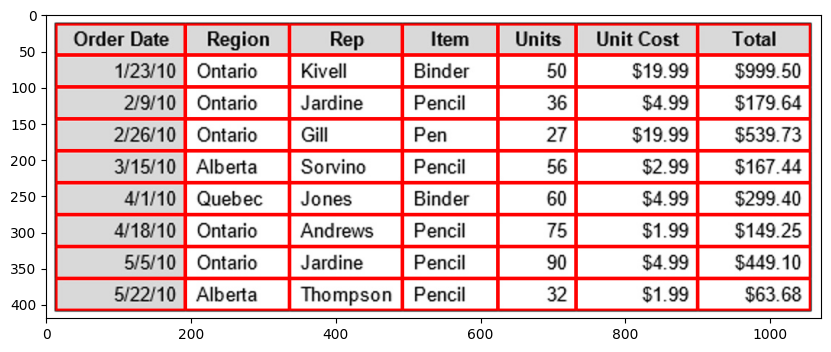

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

plt.imshow(img)

In [27]:
import pandas as pd

df = table.df

df_copy = df.copy()


df

,0,1,2,3,4,5,6
0,Order Date,Region,Rep,Item,Units,Unit Cost,Total
1,1/23/10,Ontario,Kivell,Binder,50,$19.99,$999.50
2,2/9/10,Ontario,Jardine,Pencil,36,$4.99,$179.64
3,2/26/10,Ontario,Gill,Pen,27,$19.99,$539.73
4,3/15/10,Alberta,Sorvino,Pencil,56,$2.99,$167.44
5,4/1/10,Quebec,Jones,Binder,60,$4.99,$299.40
6,4/18/10,Ontario,Andrews,Pencil,75,$1.99,$149.25
7,5/5/10,Ontario,Jardine,Pencil,90,$4.99,$449.10
8,5/22/10,Alberta,Thompson,Pencil,32,$1.99,$63.68


In [23]:
df.to_csv("new.csv", index=False, header=False)